In [1]:
%pylab inline
from pandas import *
from scipy.ndimage.filters import gaussian_filter1d
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def find_bifurcation_index(y_array):
      
    bifurcation_index = 0
    
    for i in range (n_points-2):
        delta_h1 = y_array[i+1]-y_array[i]
        delta_h2 = y_array[i+2]-y_array[i+1]
        if (delta_h1<0 and delta_h2>0):
            bifurcation_index = i+1
    
    return bifurcation_index  

In [3]:
def gaussian(x, a, b, c):
    val = a * exp(-(x - b)**2 / (2*c**2))
    return val

In [4]:
#Importing dataframe

df = read_csv('./data/galaxyoutflow.csv')

v_gal = df['v_gal']
v_out = df['v_out']
lognh = df['lognh']

In [5]:
galaxy_velocities = [60, 125] #(km/s)
outflow_velocities = [100, 200] #(km/s)
outflow_lognHs = [20.0, 20.0625, 20.125, 20.1875, 20.25, 20.3125, 20.375, 20.4375, 20.5, 20.5625, 20.625, 20.6875,
                  20.75, 20.8125, 20.875, 20.9375, 21.0, 21.0625, 21.125, 21.1875, 21.25, 21.3125, 21.375, 21.4375,
                  21.5, 21.5625, 21.625, 21.6875, 21.75, 21.8125, 21.875, 21.9375, 22.0, 22.0625, 22.125, 22.1875,
                  22.25, 22.3125, 22.375, 22.4375, 22.5]

In [19]:
#New dataframe to write results

peaks_file = open("./data/peaks_information.csv",'w')
peaks_file.write("v_gal,v_out,lognh,sigma,number_peaks,center1,center2\n")

In [20]:
for i in range(len(galaxy_velocities)):

    gal_vel = galaxy_velocities[i]  
    out_vel = outflow_velocities[i]

    for out_log in outflow_lognHs:

        df_sub = df[(v_gal==gal_vel) & (v_out==out_vel) & (lognh==out_log)]

        x = df_sub['x']
        y = df_sub['y']

        n_points = len(x)
        y_gaussian = gaussian_filter1d(y,3)
        bif_index = find_bifurcation_index(y_gaussian)

        if(bif_index != 0):

            y_gaussian = gaussian_filter1d(y,1.5)

            #Curve 1
            x1 = x[0:bif_index+1]
            y1 = y_gaussian[0:bif_index+1]

            p1 = [amax(y1), 20, 50]
            popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=p1)
            a1, b1, c1 = popt1[0], popt1[1], popt1[2]

            center1 = b1
            sigma1 = c1

            #Curve 2
            x2 = x[bif_index:n_points]
            y2 = y_gaussian[bif_index:n_points]

            p2 = [amax(y2), 500, 50]
            popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=p2)
            a2, b2, c2 = popt2[0], popt2[1], popt2[2]

            center2 = b2
            sigma2 = c2

            sigma = sigma2/sigma1
            num_peaks = 2

        else:
            p = [amax(y_gaussian), 700, 50]
            popt, pcov = curve_fit(gaussian, x, y_gaussian, p0=p)
            a, b, c = popt[0], popt[1], popt[2]

            center1 = b
            center2 = b

            sigma = 0
            num_peaks = 1

        peaks_file.write(str(gal_vel)+","+str(out_vel)+","+str(out_log)+","+str(sigma)+","+str(num_peaks)+","+str(center1)+","+str(center2)+"\n")

In [21]:
peaks_file.close()

In [8]:
#Examples

#E1: tau = 2*10^5, vgal = 60 km/s, vout = 100 km/s, lognh = 20.125
#E2: tau = 2*10^6, vgal = 125 km/s, vout = 200 km/s, lognh = 21.375

(-250, 850)

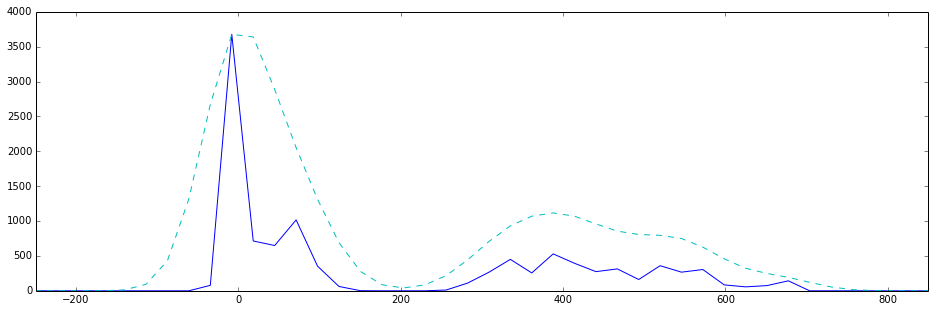

In [9]:
#E1

gal_vel = 60
out_vel = 100
out_log = 20.125

df_sub = df[(v_gal==gal_vel) & (v_out==out_vel) & (lognh==out_log)]
            
x = array(df_sub['x'])
y = array(df_sub['y'])

y_gaussian = gaussian_filter1d(y,1.5)
y_gaussian = y_gaussian*amax(y)/amax(y_gaussian)

n_points = len(x)

fig = figure(figsize=(16,5))

plot(x,y,c='b')
plot(x,y_gaussian, c='c', linestyle='--')

xlim(-250,850)

In [10]:
bif_index = find_bifurcation_index(y_gaussian)

print bif_index
print x[bif_index]
print y_gaussian[bif_index]

44
203.138201052
40.5673138548


(-250, 850)

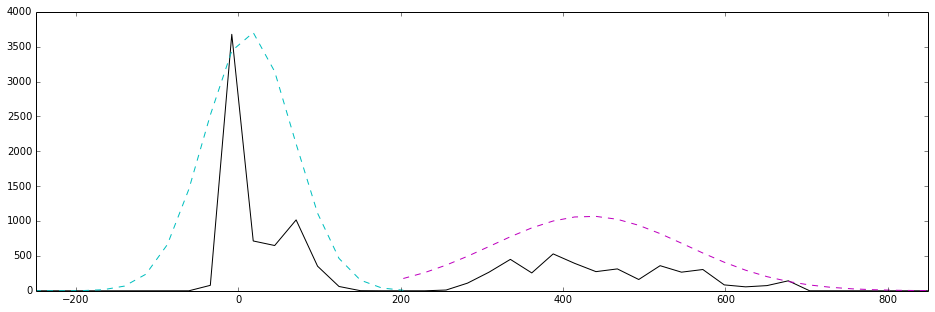

In [11]:
#Curve 1
x1 = x[0:bif_index+1]
y1 = y_gaussian[0:bif_index+1]

p1 = [amax(y1), 20, 50]
popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=p1)
a1, b1, c1 = popt1[0], popt1[1], popt1[2]

center1 = b1
sigma1 = c1

#Curve 2
x2 = x[bif_index:n_points]
y2 = y_gaussian[bif_index:n_points]

p2 = [amax(y2), 500, 50]
popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=p2)
a2, b2, c2 = popt2[0], popt2[1], popt2[2]

center2 = b2
sigma2 = c2

fig = figure(figsize=(16,5))

plot(x,y,c='black')
#plot(x1, y1, c='b')
plot(x1, gaussian(x1, a1, b1, c1), c='c', linestyle = '--')
#plot(x2, y2, c='r')
plot(x2, gaussian(x2, a2, b2, c2), c='m', linestyle = '--')

xlim(-250,850)

In [12]:
print center1, center2
print sigma1, sigma2

sigma = sigma2/sigma1
    
num_peaks = 2

if(bif_index == 0):
    num_peaks = 1
    sigma = 0
    
print sigma
print num_peaks

13.2323831759 431.740856935
54.261259691 120.390735223
2.2187235591
2


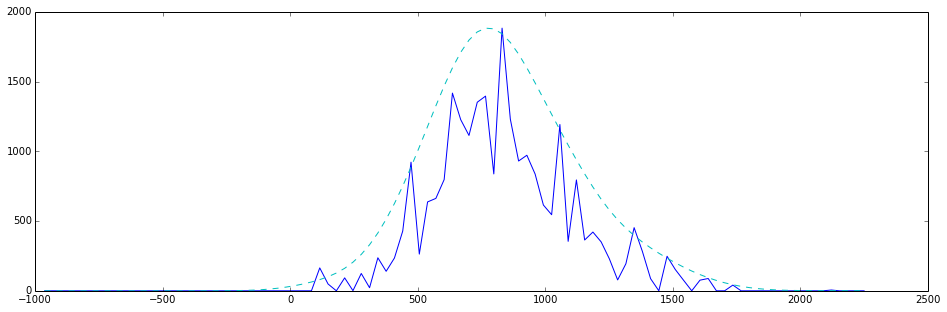

In [13]:
#E2

gal_vel = 125
out_vel = 200
out_log = 21.375

df_sub = df[(v_gal==gal_vel) & (v_out==out_vel) & (lognh==out_log)]
            
x = array(df_sub['x'])
y = array(df_sub['y'])

y_gaussian = gaussian_filter1d(y,4)
y_gaussian = y_gaussian*amax(y)/amax(y_gaussian)

n_points = len(x)

fig = figure(figsize=(16,5))

plot(x,y,c='b')
plot(x,y_gaussian, c='c', linestyle='--')

#xlim(-500, 2600)

In [14]:
bif_index = find_bifurcation_index(y_gaussian)

print bif_index
print x[bif_index]
print y_gaussian[bif_index]

0
-963.025020081
0.0


In [15]:
p = [amax(y_gaussian), 700, 50]
popt, pcov = curve_fit(gaussian, x, y_gaussian, p0=p)
a, b, c = popt[0], popt[1], popt[2]

center = b

print a,b,c

1830.13110949 805.650036248 283.504217442


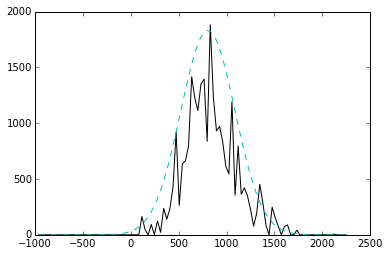

In [16]:
plot(x,y,c='black')
plot(x, gaussian(x, a, b, c), c='c', linestyle = '--')

In [17]:
if(bif_index == 0):
    num_peaks = 1
    sigma = 0
    
print sigma
print num_peaks
print center

0
1
805.650036248
